In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# import in a pandas dataframe the dataset
data1 = pd.read_csv('DATA_for_visualization/data_v1_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
data1.shape

(1000, 5)

In [4]:
# this works only if there are effectively 5 columns
data1.columns = ['x1','x2','x3','x4','x5']

# import in a separated numpy array the color labels 
color1 = pd.read_csv('DATA_for_visualization/color_v1_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
color1 = color1.values.flatten()

First of all we take a quick look at the dataset using pandas methods:
* head shows the first 5 rows;
* describe gives us some statistical descriptors of the dataset.

In [5]:
data1.head()

,x1,x2,x3,x4,x5
0,21.508,-32.514,-51.861,-28.455,-8.882
1,9.886,-11.606,-21.953,-19.338,-2.747
2,36.548,-21.188,-46.424,-10.763,-2.112
3,-0.808,-0.872,-8.373,-38.594,-7.829
4,37.563,27.401,16.005,-18.521,-9.128


In [6]:
data1.describe()

,x1,x2,x3,x4,x5
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,16.825300,2.939053,-11.190577,-12.700631,-7.756682
std,19.490307,14.493572,17.224971,15.759366,4.590554
min,-12.487000,-33.821000,-57.960000,-50.200000,-19.483000
25%,1.105250,-7.611000,-22.071500,-24.575250,-10.953500
50%,11.102500,3.499500,-6.614500,-6.236000,-7.677500
75%,27.296000,13.362500,-0.733250,-0.687500,-4.607750
max,68.887000,35.175000,23.463000,11.328000,8.499000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

Now we exploit the seaborn method pairplot to visualize all possible orthogonal projections in two dimensions of the dataset. Notice that along the diagonal are shown the distributions of each variable through an histogram representation.

This step helps us in understanding what to expect from a more advanced visualization like the one provided by t-SNE algorithm. 

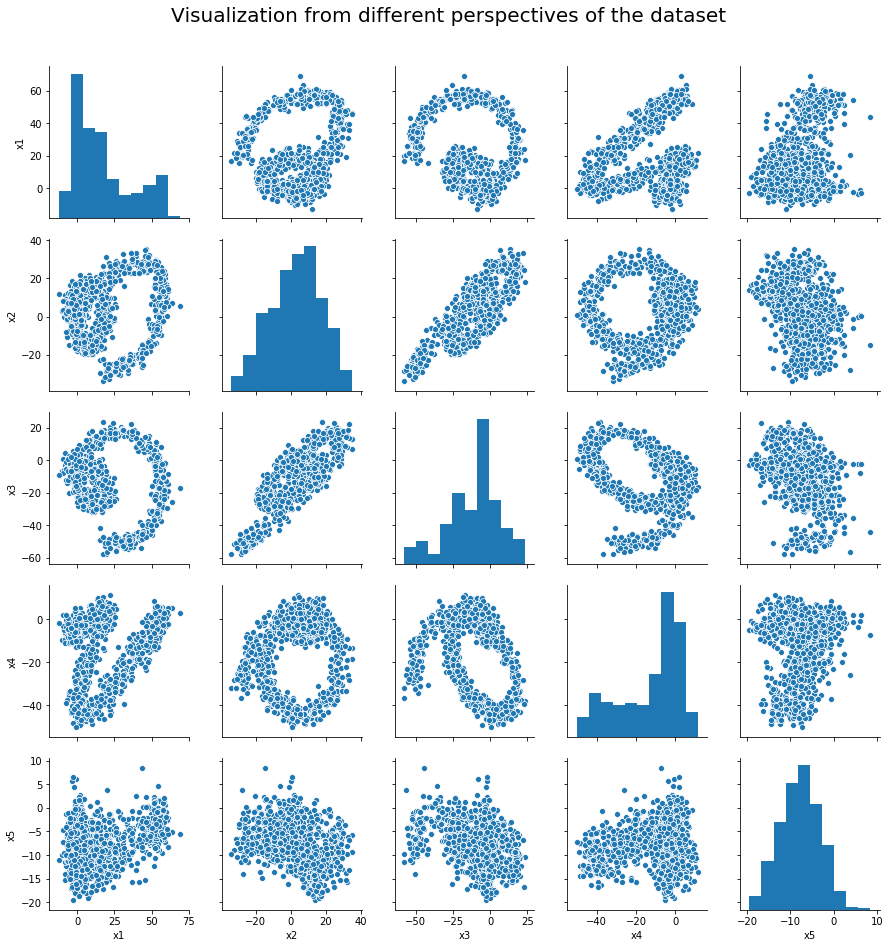

In [8]:
sns.pairplot(data1)
plt.suptitle("Visualization from different perspectives of the dataset ", fontsize = 20, y = 1.05)
plt.show()
plt.close()

## Visualization through t-SNE

In [16]:
def plot_t_SNE(X, ax, colors = None, **kwargs ):
    
    """ 
    ---------------------
    INPUTS:
    X : numpy ndarray
    ax : matplotlib axis of a figure
    colors : numpy array of length X.shape[0]
    possible kwargs: 
        - n_component (default = 2)
        - init = {'random', 'pca'} (default = 'random')
        - perplexity (range between 2 and 100, default = 30)
        - n_iter (default = 1000)
        - learning_rate (default = 200)
    
    see help(sklearn.manifold.t_sne) for all possible keywords
    """
    
    from matplotlib.ticker import NullFormatter
    from sklearn import manifold
    
    # create a new instance of TSNE class
    tsne = manifold.TSNE(**kwargs)
    # apply t_SNE transform to the original dataset X
    Y = tsne.fit_transform(X)
    
    title = ''
    for key in kwargs:
        # if the parameter is an integer
        if isinstance(kwargs[key], int):
            title += key+' = %d \n'%kwargs[key]
        # if the parameter is a string (no other options available)
        else:
            title += key+' = '+str(kwargs[key])+' \n'
    
    
    if title == '':
        # default title
        ax.set_title("Perplexity = %d" % 30, fontsize = 15)
    else:
        #custom title
        ax.set_title(title, fontsize = 15)
    
    # plots the result (works only for 2 components) 
    ax.scatter(Y[:,0], Y[:,1], c = colors, cmap = 'plasma')

    # removes ticks from axis
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    


In [27]:
plt.close()

# map the pandas dataframe to a numpy ndarray
X = data1.values

# list of all the parameters we want to try
perplexities = [2, 5, 50, 100]

# instead of grid-searching all possible combinations, we just want to try single variations from the default parameters
# default options: init = 'random', n_iter = 1000, learning_rate = 200
kw_dict = {}
kw_dict = dict(init = ['pca'], early_exaggeration = [50])
print(kw_dict)
print(len(kw_dict))

{'init': ['pca'], 'early_exaggeration': [50]}
2


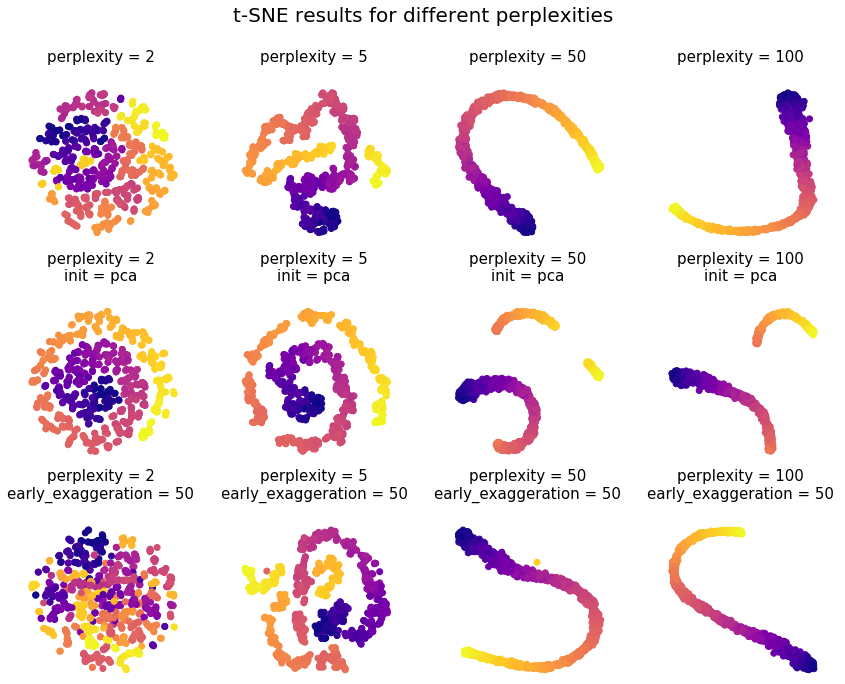

In [28]:
n_rows = 1
for key in kw_dict:
    for item in kw_dict[key]:
        n_rows += 1

(fig, subplots) = plt.subplots(n_rows, 4, figsize=(12, 3*n_rows))
plt.suptitle("t-SNE results for different perplexities", fontsize = 20, y = 1.05)



# first we execute it once with default settings
for j, perplexity in enumerate(perplexities):
        ax = subplots[0][j]
        ax.axis('off')
        plot_t_SNE(X, ax, colors = color1, perplexity = perplexity)

# then we cicle among all the parameters of the dictionary
i = 1
for key in kw_dict:
    for item in kw_dict[key]:
        for j, perplexity in enumerate(perplexities):
            ax = subplots[i][j]
            ax.axis('off')
            plot_t_SNE(X, ax, colors = color1, perplexity = perplexity, **{key : item})
        i += 1
            

plt.tight_layout()
plt.show()
plt.close()

In [34]:
# import in a pandas dataframe the dataset
data2 = pd.read_csv('DATA_for_visualization/data_v2_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
data2.shape
data2.columns = ['x1','x2','x3','x4','x5']

# import in a separated numpy array the color labels 
color2 = pd.read_csv('DATA_for_visualization/color_v2_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
color2 = color2.values.flatten()

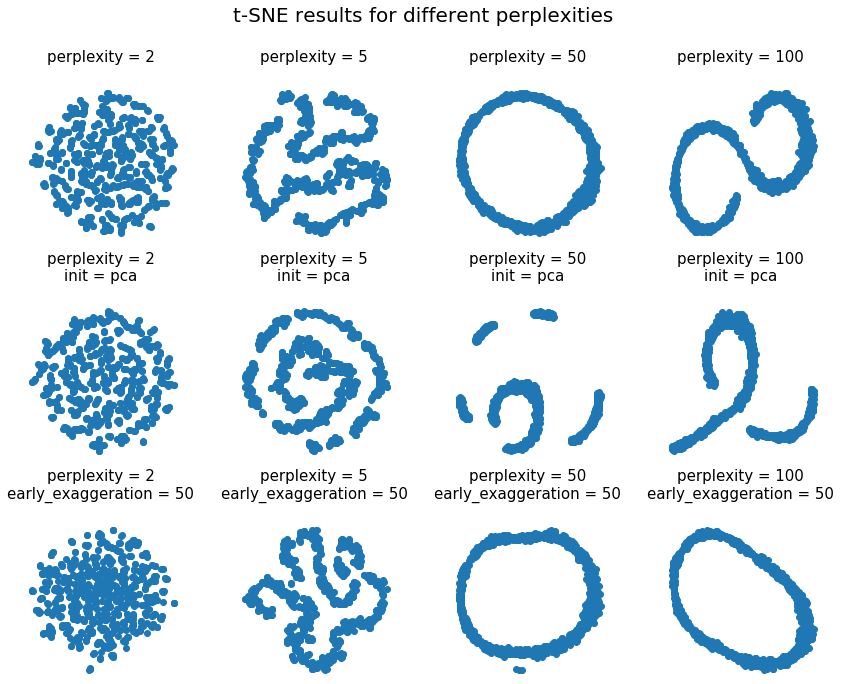

In [35]:
X = data2.values
n_rows = 1
for key in kw_dict:
    for item in kw_dict[key]:
        n_rows += 1

(fig, subplots) = plt.subplots(n_rows, 4, figsize=(12, 3*n_rows))
plt.suptitle("t-SNE results for different perplexities", fontsize = 20, y = 1.05)

# first we execute it once with default settings
for j, perplexity in enumerate(perplexities):
        ax = subplots[0][j]
        ax.axis('off')        
        plot_t_SNE(X, ax, colors = None, perplexity = perplexity)

# then we cicle among all the parameters of the dictionary
i = 1
for key in kw_dict:
    for item in kw_dict[key]:
        for j, perplexity in enumerate(perplexities):
            ax = subplots[i][j]
            ax.axis('off')
            plot_t_SNE(X, ax, colors = None, perplexity = perplexity, **{key : item})
        i += 1
            

plt.tight_layout()
plt.show()
plt.close()

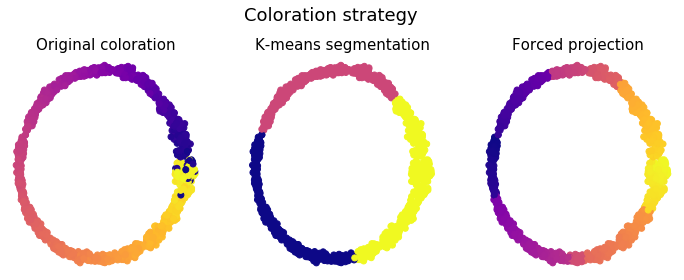

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from matplotlib.ticker import NullFormatter
from sklearn import manifold

# create a new instance of TSNE class
tsne = manifold.TSNE(n_components=1, init='random', perplexity = 100, n_iter = 5000, learning_rate=200, verbose = 0)
# apply t_SNE transform to the original dataset X
Z = tsne.fit_transform(X)


#from sklearn.neighbors import NearestNeighbors
#nbrs = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
#distances, indices = nbrs.kneighbors(X)
#clf = KNeighborsClassifier(2)
#clf.fit(Y_tsne)
#Z = clf.predict(Y_tsne)

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

tsne = manifold.TSNE(n_components=2, init='random', perplexity = 50, n_iter = 5000, learning_rate=200, verbose = 0)
Y = tsne.fit_transform(X)

kmeans = KMeans(n_clusters=3).fit_predict(Y)

fig.suptitle("Coloration strategy", y=1.05, fontsize = 18)
ax[0].set_title('Original coloration', fontsize = 15)
ax[1].set_title('K-means segmentation', fontsize = 15)
ax[2].set_title('Forced projection', fontsize = 15)
# plots the result (works only for 2 components) 
ax[0].scatter(Y[:,0], Y[:,1], c = color2, cmap = 'plasma')
ax[1].scatter(Y[:,0], Y[:,1], c = kmeans, cmap = 'plasma')
ax[2].scatter(Y[:,0], Y[:,1], c = Z[:,0], cmap = 'plasma')

# removes ticks from axis
ax[0].xaxis.set_major_formatter(NullFormatter())
ax[0].yaxis.set_major_formatter(NullFormatter())
ax[0].axis('tight')
ax[1].xaxis.set_major_formatter(NullFormatter())
ax[1].yaxis.set_major_formatter(NullFormatter())
ax[1].axis('tight')
ax[2].xaxis.set_major_formatter(NullFormatter())
ax[2].yaxis.set_major_formatter(NullFormatter())
ax[2].axis('tight')

plt.show()


In [37]:
data3 = pd.read_csv('DATA_for_visualization/data_v5_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
data3.shape

(1000, 5)

In [38]:
data3.columns = ['x1','x2','x3','x4','x5']

# For this experiment we will not see at the colour vector until we had implemented ourself it
# import in a separated numpy array the color labels 
color3 = pd.read_csv('DATA_for_visualization/color_v5_for_t-SNE__R50_e3_n2_nd1000.dat', sep = '\t', header = None)
color3 = color3.values.flatten()

In [39]:
data3.head()

,x1,x2,x3,x4,x5
0,30.269,-17.283,-36.390,45.927,6.573
1,-46.059,-58.968,-50.544,-36.667,1.990
2,-49.395,-100.661,-64.408,-49.245,15.659
3,-33.474,-102.659,-91.044,-11.965,13.784
4,-38.549,-13.443,7.003,-54.624,-7.430


In [40]:
plt.close()

# map the pandas dataframe to a numpy ndarray
X = data3.values

# list of all the parameters we want to try
perplexities = [2, 5, 50, 100]

# instead of grid-searching all possible combinations, we just want to try single variations from the default parameters
# default options: init = 'random', n_iter = 1000, learning_rate = 200
kw_dict = {}
kw_dict = dict(init = ['pca'], n_iter = [5000])
print(kw_dict)
print(len(kw_dict))

{'init': ['pca'], 'n_iter': [5000]}
2


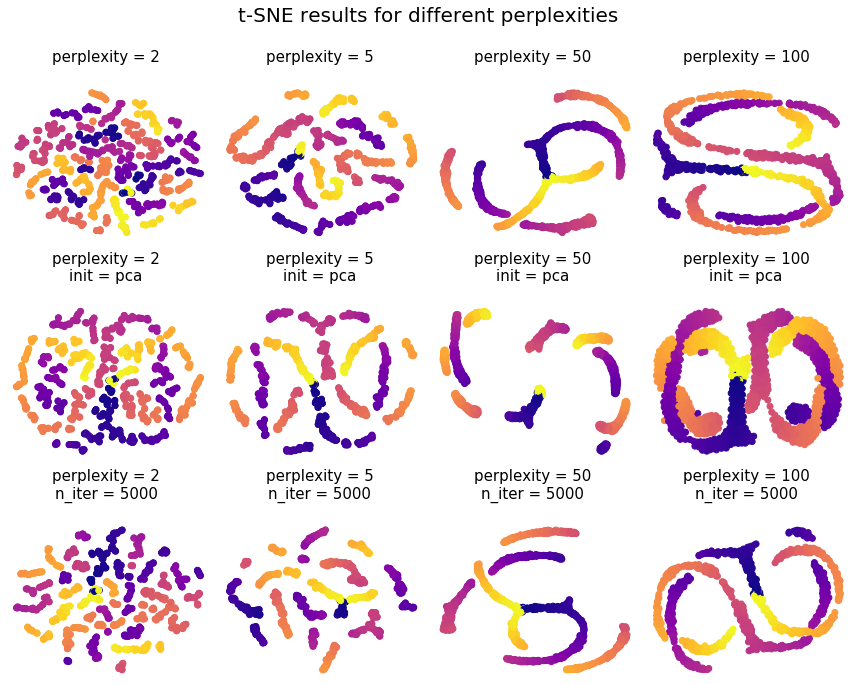

In [41]:
n_rows = 1
for key in kw_dict:
    for item in kw_dict[key]:
        n_rows += 1

(fig, subplots) = plt.subplots(n_rows, 4, figsize=(12, 3*n_rows))
plt.suptitle("t-SNE results for different perplexities", fontsize = 20, y = 1.05)

# first we execute it once with default settings
for j, perplexity in enumerate(perplexities):
        ax = subplots[0][j]
        ax.axis('off')
        plot_t_SNE(X, ax, colors = color3, perplexity = perplexity)

# then we cicle among all the parameters of the dictionary
i = 1
for key in kw_dict:
    for item in kw_dict[key]:
        for j, perplexity in enumerate(perplexities):
            ax = subplots[i][j]
            ax.axis('off')
            plot_t_SNE(X, ax, colors = color3, perplexity = perplexity, **{key : item})
        i += 1
            

plt.tight_layout()
plt.show()
plt.close()

In [ ]:
def plot3D_t_SNE(X, colors = None, kflag = False, **kwargs ):
    
    """ 
    ---------------------
    INPUTS:
    X : numpy ndarray
    ax : matplotlib axis of a figure
    colors : numpy array of length X.shape[0]
    possible kwargs: 
        - n_component (default = 3)
        - init = {'random', 'pca'} (default = 'random')
        - perplexity (range between 2 and 100, default = 30)
        - n_iter (default = 1000)
        - learning_rate (default = 200)
    
    see help(sklearn.manifold.t_sne) for all possible keywords
    """
    
    from sklearn import manifold
    # we use plotly library for 3D plotting
    import plotly as py # main class
    import plotly.graph_objs as go # graphical objects
    py = py.offline
    py.init_notebook_mode(connected=True)

    # create a new instance of TSNE class
    kwargs['n_components'] = 3
    tsne = manifold.TSNE(**kwargs)
    # apply t_SNE transform to the original dataset X
    Y = tsne.fit_transform(X)
    
    if kflag:
        colors = KMeans(n_clusters=20).fit_predict(Y)

    
    title = ''
    for key in kwargs:
        # if the parameter is an integer
        if isinstance(kwargs[key], int):
            title += key+' = %d , '%kwargs[key]
        # if the parameter is a string (no other options available)
        else:
            title += key+' = '+kwargs[key]+' , '
    
    if title == '':
        # default title
        title = "Perplexity = %d" % 30
    
    # plots the result (works only for 2 components) 
    # ax.scatter(Y[:,0], Y[:,1], c = color1, cmap = 'plasma')
    
    # pay attention at matplotlib compatibility!!
    trace1 = go.Scatter3d(x=Y[:,0], y=Y[:,1], z=Y[:,2], mode='markers', marker = dict(colorscale='Electric', 
                         color=colors, size=6, line=dict(width=0)))
    # opacity = 0.7,
    data = [trace1]
    layout = go.Layout(title = title)
    fig = go.Figure(data=data, layout = layout)
    py.iplot(fig)


In [20]:
plot3D_t_SNE(X, color3, kflag = False, perplexity = 20, n_iter = 10000, learning_rate = 100, init = 'pca')

In [21]:
plot3D_t_SNE(X, color2, perplexity = 2, n_iter = 10000, learning_rate = 100, init = 'pca')

In [22]:
import numpy as np
from sklearn import manifold
from sklearn.datasets import fetch_openml # MNIST data1
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [23]:
X_train = X[:60000]
y_train = y[:60000]
y_train = np.array(y_train, dtype='int')
tsne = manifold.TSNE(n_components=2, init='random', perplexity = 30, n_iter = 10000, learning_rate=200, verbose = 10)
X_tsne = tsne.fit_transform(X_train)



[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 60000 samples in 30.543s...
[t-SNE] Computed neighbors for 60000 samples in 3625.680s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for

[t-SNE] Iteration 2050: error = 2.6699667, gradient norm = 0.0000247 (50 iterations in 32.996s)
[t-SNE] Iteration 2100: error = 2.6605172, gradient norm = 0.0000238 (50 iterations in 33.008s)
[t-SNE] Iteration 2150: error = 2.6514928, gradient norm = 0.0000231 (50 iterations in 33.190s)
[t-SNE] Iteration 2200: error = 2.6428645, gradient norm = 0.0000224 (50 iterations in 33.512s)
[t-SNE] Iteration 2250: error = 2.6345952, gradient norm = 0.0000218 (50 iterations in 33.235s)
[t-SNE] Iteration 2300: error = 2.6267428, gradient norm = 0.0000212 (50 iterations in 32.995s)
[t-SNE] Iteration 2350: error = 2.6191792, gradient norm = 0.0000210 (50 iterations in 33.067s)
[t-SNE] Iteration 2400: error = 2.6119542, gradient norm = 0.0000203 (50 iterations in 33.008s)
[t-SNE] Iteration 2450: error = 2.6049957, gradient norm = 0.0000201 (50 iterations in 33.279s)
[t-SNE] Iteration 2500: error = 2.5984836, gradient norm = 0.0000198 (50 iterations in 33.124s)
[t-SNE] Iteration 2550: error = 2.592282

[t-SNE] Iteration 6350: error = 2.4668908, gradient norm = 0.0000119 (50 iterations in 33.775s)
[t-SNE] Iteration 6400: error = 2.4663439, gradient norm = 0.0000118 (50 iterations in 33.551s)
[t-SNE] Iteration 6450: error = 2.4657571, gradient norm = 0.0000117 (50 iterations in 33.722s)
[t-SNE] Iteration 6500: error = 2.4652538, gradient norm = 0.0000118 (50 iterations in 33.763s)
[t-SNE] Iteration 6550: error = 2.4647112, gradient norm = 0.0000117 (50 iterations in 33.801s)
[t-SNE] Iteration 6600: error = 2.4641531, gradient norm = 0.0000115 (50 iterations in 33.802s)
[t-SNE] Iteration 6650: error = 2.4635875, gradient norm = 0.0000114 (50 iterations in 33.730s)
[t-SNE] Iteration 6700: error = 2.4630339, gradient norm = 0.0000113 (50 iterations in 33.814s)
[t-SNE] Iteration 6750: error = 2.4625127, gradient norm = 0.0000114 (50 iterations in 33.341s)
[t-SNE] Iteration 6800: error = 2.4619968, gradient norm = 0.0000113 (50 iterations in 33.383s)
[t-SNE] Iteration 6850: error = 2.461446

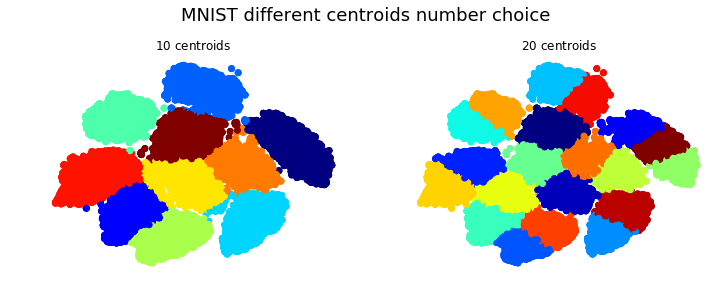

In [24]:
from sklearn.cluster import KMeans
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters).fit_predict(X_tsne)
kmeans10 = KMeans(n_clusters=10).fit_predict(X_tsne)
kmeans20 = KMeans(n_clusters=20).fit_predict(X_tsne)

def score(kmeans, y_train, n_clusters = 2):
    from collections import Counter
    kmeans_new = np.array(kmeans)
    for i in range(n_clusters):
        k = Counter(y_train[kmeans == i])
        kmeans_new[kmeans == i] = k.most_common(1)[0][0]
    return ((kmeans_new - y_train)!=0).sum()/60000, kmeans_new


err, kmeans_new = score(kmeans, y_train, n_clusters)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].axis('off')
ax[1].axis('off')

fig.suptitle("MNIST different centroids number choice", y=1.05, fontsize = 18)
ax[0].set_title('$10$ centroids')
ax[1].set_title('$20$ centroids')
# plots the result (works only for 2 components) 
ax[0].scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans10, cmap='jet')
ax[1].scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans20, cmap='jet')
#cax = fig.add_axes([0.94, 0.123, 0.03, 0.76])
#plt.colorbar(im, cax=cax)

plt.show()


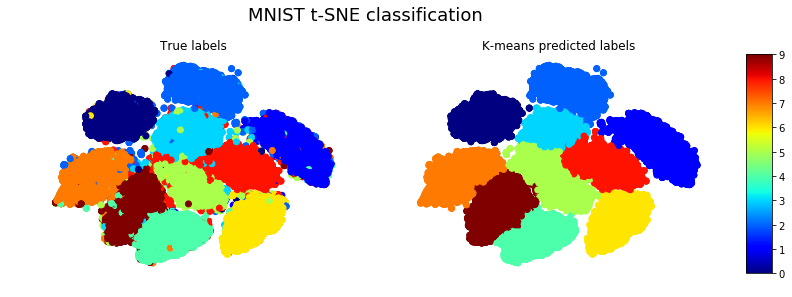

The accuracy achieved is: 93.4%


In [25]:
from matplotlib.ticker import NullFormatter

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].axis('off')
ax[1].axis('off')

fig.suptitle("MNIST t-SNE classification", y=1.05, fontsize = 18)
ax[0].set_title('True labels')
ax[1].set_title('K-means predicted labels')
# plots the result (works only for 2 components) 
ax[0].scatter(X_tsne[:,0], X_tsne[:,1], c=y_train, cmap='jet')
im = ax[1].scatter(X_tsne[:,0], X_tsne[:,1], c=kmeans_new, cmap='jet')
cax = fig.add_axes([0.94, 0.123, 0.03, 0.76])
plt.colorbar(im, cax=cax)

plt.show()

print("The accuracy achieved is:", str(round((1-err)*100,1))+"%")